# PCA on the U.S. Treasury Yield Curve


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Load and Inspect Data

In [18]:
df=pd.read_csv("UST_Yield_Curve.csv",index_col=0, parse_dates=True)

df.head()

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
2004-01-02,0.88,0.93,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,5.30
2004-01-05,0.88,0.91,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,5.28
2004-01-06,0.88,0.91,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,5.26
2004-01-07,0.88,0.91,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,5.22
2004-01-08,0.87,0.88,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,5.20


## Standardize Features and Run PCA

In [19]:
y_centred=df-df.mean()

cov_matrix=y_centred.cov()
eigval, eigvec= np.linalg.eig(cov_matrix)

idx=eigval.argsort()[::-1]
eigval= eigval[idx]
eigvec=eigvec[:,idx]

explained_variance_ratio = eigval/eigval.sum()
cum_var=np.cumsum(explained_variance_ratio)

## Compute Correlation Matrix and Visualize with Heatmap

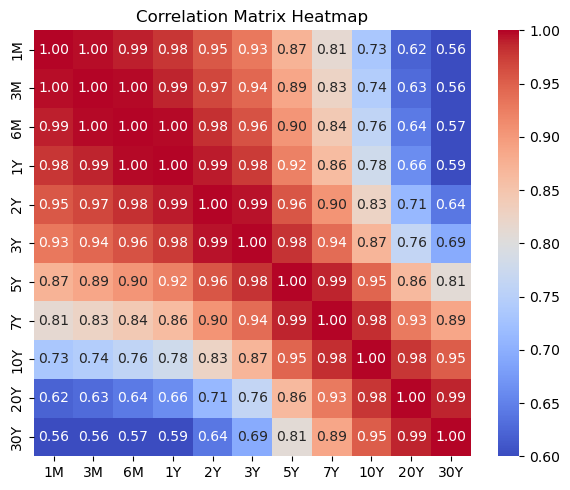

In [28]:
corr = y_centred.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True,fmt=".2f", cmap='coolwarm',vmin=0.6, vmax=1.0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## Plot Explained Variance Ratio

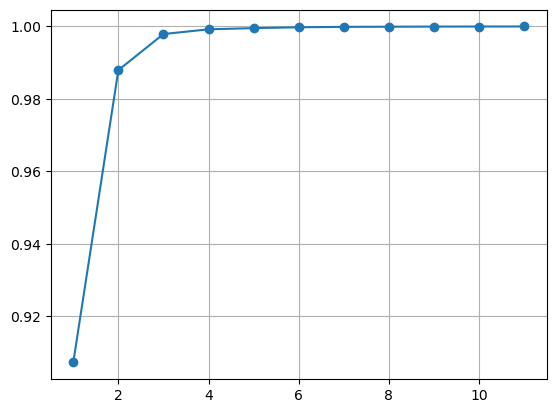

In [21]:
plt.plot(np.arange(1,len(cum_var)+1),cum_var,marker='o')
plt.grid(True)
plt.show()

## Calculate and Display Scores

In [22]:
scores = y_centred.values @ eigvec
scores = pd.DataFrame(
    data=scores,
    index=df.index,
    columns=[f'PC{i+1}' for i in range(eigvec.shape[1])])
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Date,,,,,,,,,,,
2004-01-02,0.268333,3.447335,-0.072142,0.139754,-0.096334,-0.027394,0.066285,0.029156,0.029369,-0.031432,-0.028129
2004-01-05,0.321738,3.464335,-0.116283,0.133283,-0.074414,-0.048042,0.036722,0.038120,0.014959,-0.043881,-0.012479
2004-01-06,0.112224,3.307701,0.009686,0.099932,-0.087278,-0.004899,0.041310,0.060495,0.020887,-0.045366,-0.014321
2004-01-07,0.073276,3.259421,0.008434,0.100378,-0.087422,-0.021047,0.043506,0.047931,0.015834,-0.053913,-0.032440
2004-01-08,0.056677,3.265314,-0.015652,0.094844,-0.092356,-0.047098,0.032341,0.045405,0.014344,-0.045525,-0.023934


## Display Principal Component Loadings

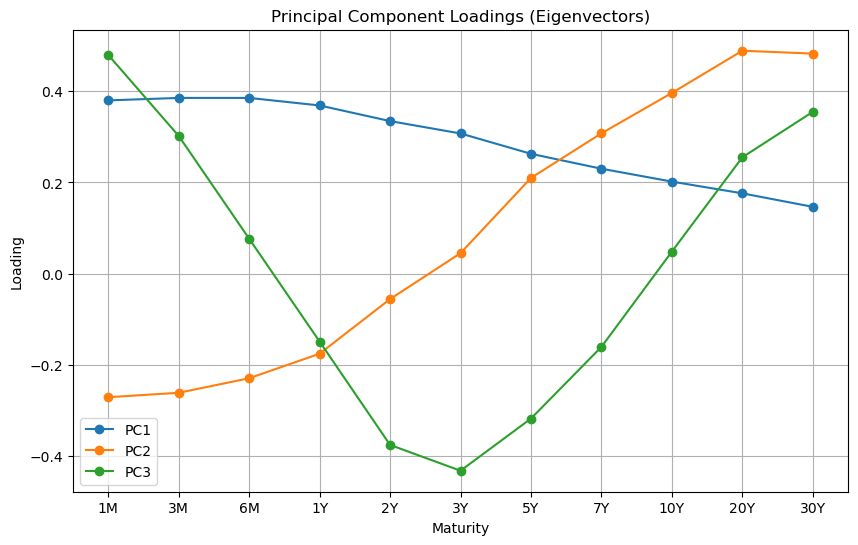

In [23]:
maturities = df.columns.astype(str)

plt.figure(figsize=(10, 6))

# First 3 PCs only
for i in range(3):
    plt.plot(maturities, eigvec[:, i], marker='o', label=f'PC{i+1}')

plt.title('Principal Component Loadings (Eigenvectors)')
plt.xlabel('Maturity')
plt.ylabel('Loading')
plt.legend()
plt.grid(True)
plt.show()

## Time Series of Principal Component Scores

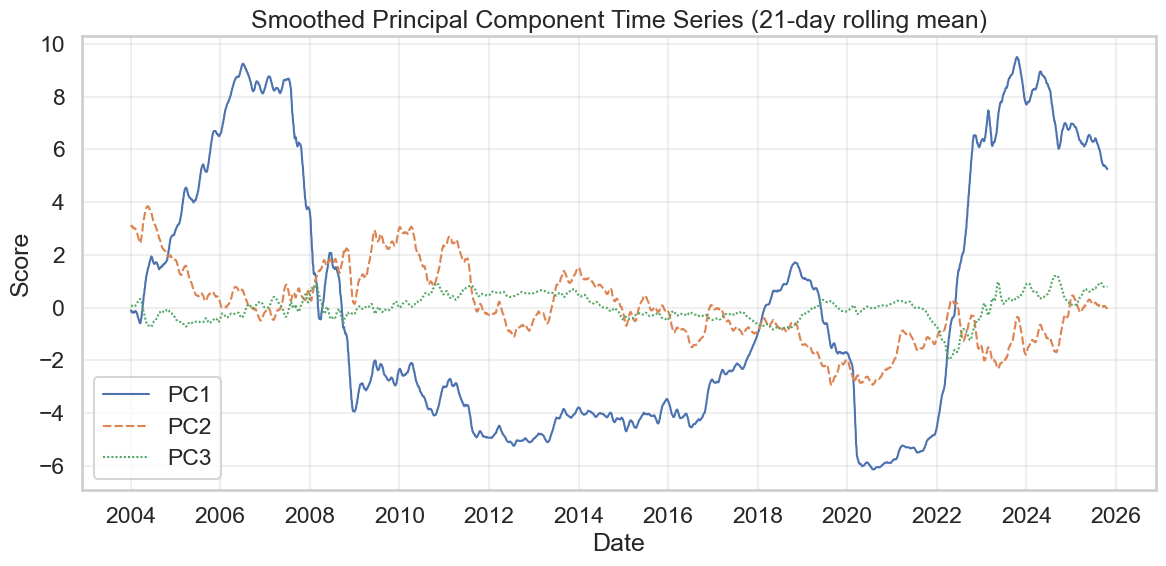

In [41]:
# Smooth using rolling mean (e.g. 1-month = 21 business days)
smooth_scores = scores.rolling(window=21, center=True, min_periods=1).mean()

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12,6))
sns.lineplot(data=smooth_scores.iloc[:, :3], linewidth=1.5, palette="deep")

plt.title("Smoothed Principal Component Time Series (21-day rolling mean)")
plt.xlabel("Date")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


## Observations

- **PC1 (Level factor):** Shows large downward shifts during 2008–2009 and 2020, reflecting broad declines in yields during the Global Financial Crisis and the pandemic.  
- **PC2 (Slope factor):** Rises during crises as short-term rates fall faster than long-term rates, indicating yield-curve steepening.  
- **PC3 (Curvature factor):** Small relative movements capture mid-curve adjustments; becomes more volatile post-2020 as policy uncertainty increased.  
- Overall, the first component dominates the total variance and aligns with macroeconomic cycles and monetary policy turning points.

## Summary

- The yield curve is highly correlated across maturities, allowing PCA to extract a few dominant factors.  
- The first three principal components capture **level**, **slope**, and **curvature** movements that explain most yield variations.  
- The level factor (PC1) reflects broad interest rate shifts linked to major macroeconomic events.  
- PCA provides a compact view of curve dynamics useful for risk analysis, portfolio hedging, and scenario design.
